#  Data collection and preparation

Author: Fenna Feenstra and Nick Veltmaat

Data preprocessing is an integral step in the application of artificial intelligence. The ability of a machine-learning model to learn from the data depends on the quality of the data, the characteristics of the data and the amount of information it captures. Sometimes the way data is stored in files or databases is not in the right format for a particular task. Therefore, it is extremely important that we explore and preprocess our data, before feeding it into our model. 

In machine-learning applications a significant amount of time is spent on data preparation: loading, exploring, cleaning, transformation and rearranging. Such tasks are often reported to take 80% or more on the analyst's time [1]. Fortunately can use program languages such as `Python` and libraries like `pandas` and `seaborn` to help us to explore, clean, improve the quality and manipulate the data in the right format. This notebook covers the most common tasks in data preparation.


[1] McKinney, Wes. Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.", 2017.



# Required data format for the ML algorithms

Most of the machine learning algorithms need a feature matrix $X$ with a column for each feature and a row for each observation and, in the case of supervised learning, a vector $y$ with the observed label for each observation. 

\begin{equation}
X = 
   \begin{bmatrix} \
    x_1^{(1)}  & x_2^{(1)} & x_3^{(1)}\\
    x_1^{(2)}  & x_2^{(2)} & x_3^{(2)}\\ 
    x_1^{(3)}  & x_2^{(3)} & x_3^{(3)} \\ 
    .. & .. & .. \\ 
    x_1^{(m)}  & x_2^{(m)} & x_3^{(m)} \\ 
   \end{bmatrix} 
   \
   %
   y = 
   \begin{bmatrix} \
   y^{(1)} \\
   y^{(2)} \\ 
   y^{(3)} \\ 
   .. \\ 
   y^{(m)} \\ 
   \end{bmatrix} 
  %
\end{equation}

The first sample is annotated as ($x_n^{(1)}$), so the first feature of the first observation is annotated as $x_1^{(1)}$

This means that we need a dataframe containing observations in rows and feature information (independent variables) in columns. Lastly we need the label (dependent variable) in a column. If we have data which is not organized this way we need to reshape the data. There is no need to reshape the data in the original dataset. We can simply load the original dataset and reshape the data in our python script using a pandas dataframe to get the required format. 

# Exploratory data analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics. In the Exploratory data analysis we can answer questions such as:


- Do we have metadata of the data, do we know what the headers represent (name, meaning, units, how collected)? 
- Is the data in the [correct](#info) data type?
- Do we need to [reshape](#transpose) the data?
- Is imputation needed to handle [missing](#miss) data?
- Are there [outliers](#out) and how might they effect the model?
- What is the [sample size](#info) and how might that effect the (statistical) calculations in the model to apply?
- How many features does the dataset contain in relation to the samplesize. Is feature selection required?
- Are features correlated or derived from each other? Is [covariance](#corr) occuring?
- How are features distributed? Is transformation to normal distribution needed? Is a resample strategy needed?
- How is the [label distributed](#balance)? Is a resample strategy needed?
- Is [normalization](#norm) of the data needed?


The library `pandas` has several methods we can use for the EDA. Once we do know the answer to the questions we can manipulate and reformat the data to improve the quality of the data and to make the data suitable for feeding it to a ML algorithm. This is called data processing. In real life EDA and data processing is not executed seperately but combined. Once we are familiar with the necesarry cleaning and restructuring steps however we do make a separate script for this data processing steps to prepare new data which needed to be used by the model. 





In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Common data processing steps

Unfortunately, data from real-life cases is often not nicely structured. We need to manipulate the unstructured and/or messy data into a structured or clean form. We need to drop rows and columns because they are not needed for the analysis or because we cannot use them in case of too many missing values. Maybe we need to relabel columns or reformat characters into numerical values. Or we need to combine data from several sources. From the EDA we do know what is needed. Data processing starts with data in its raw form and converts it into a more readable dataframe format. Typical steps in data processing are:

- [Loading the data](#load)
- [rename headers](#rename)
- [Subselect data](#sub)
- [Handling missing data](#miss)
- [Data transformation](#trans)
- [Detecting and filtering outliers](#out)
- [String manipulations](#regex)
- [Data wrangling (join, combine, reshape, pivoting)](#wrang)
- [Normalize data](#norm)

Again. The library `pandas` has several methods to execute these steps 

---

<a name='load'></a>
# 1. Loading the data

Pandas features a number of functions reading from tabular data as a dataframe object. pandas has read methods to read csv, fixed width column formats, excel, hdf5, html, json, xml, pickle, messagepack, SAS, sql, stata and feather formatted files. Sometimes data needs to be loaded in a with open for loop. 

For this demonstration notebook we will read lung cancer data from a study to identify NSCLC tumor-types [2]. Data is provided in several sources, a clinical lung cancer dataset and a gene expression data set, so we need first load the different sources and then combine the sources in one dataframe. 

[2] http://doi.org/10.7937/K9/TCIA.2015.L4FRET6Z

[3] https://ftp.ncbi.nlm.nih.gov/geo/series/GSE58nnn/GSE58661/matrix/


## 1.1 Loading lung data

The clinical lung data is in an excel format and contains 89 samples. The data can be loaded to a dataframe using `pd.read_excel` method. Do always check head and tail to see if the data is correctly loaded

In [2]:
# https://wiki.cancerimagingarchive.net/download/attachments/16056856/Lung3.metadata.xls?version=1&modificationDate=1404237338168&api=v2
clinical = pd.read_excel('data/Lung3.metadata.xls') #load metadata
clinical.head(3)

,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
0,LUNG3-01,lung_1,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
1,LUNG3-02,lung_2,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Primary,Not Available,total RNA,biotin,GPL15048
2,LUNG3-03,lung_3,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,pN0,pM0,Primary,3,total RNA,biotin,GPL15048


In [3]:
clinical.tail(3)

,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
86,LUNG3-87,lung_87,LUNG3-87.CEL,Right Middle Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, Papillary",3.5,pT2,pN0,pM0,Primary,2,total RNA,biotin,GPL15048
87,LUNG3-88,lung_88,LUNG3-88.CEL,Right Upper Lobe,Homo sapiens,M,"Non-Small Cell, Pleomorphic Type",8.5,pT3,pN0,pM0,Primary,Not Available,total RNA,biotin,GPL15048
88,LUNG3-89,lung_89,LUNG3-89.CEL,Left Upper Lobe,Homo sapiens,F,"Squamous Cell Carcinoma, NOS",3.5,pT2,pN1,pM0,Primary,1,total RNA,biotin,GPL15048


In [4]:
clinical.columns

Index(['sample.name', 'title', 'CEL.file', 'source.location', 'organism',
       'characteristics.tag.gender', 'characteristics.tag.histology',
       'characteristics.tag.tumor.size.maximumdiameter',
       'characteristics.tag.stage.primary.tumor',
       'characteristics.tag.stage.nodes', 'characteristics.tag.stage.mets',
       'characteristics.tag.primaryVSmets', 'characteristics.tag.grade',
       'molecule tested', 'label', 'platform'],
      dtype='object')

<a name='sub'></a>

In [5]:

# take only the columns with added value
clinical = clinical[['sample.name', 'source.location', 
       'characteristics.tag.gender', 'characteristics.tag.histology',
       'characteristics.tag.tumor.size.maximumdiameter',
       'characteristics.tag.stage.primary.tumor',
       'characteristics.tag.stage.nodes', 'characteristics.tag.stage.mets', 
       'characteristics.tag.grade']]
clinical.head(3)

,sample.name,source.location,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.grade
0,LUNG3-01,Left Lower Lobe,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,3
1,LUNG3-02,Left Lower Lobe,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Not Available
2,LUNG3-03,Left Lower Lobe,M,Non-Small Cell,11.0,pT3,pN0,pM0,3


Now all seems to be nicely structured no additional action is required at this moment

## 1.2 Loading gene expression data
If we inspect the gene expression data [3] we see that the gene expression data is in tabular format so we can use the `read_csv` method. The first *62* lines are comments so we need to skip the first 62 lines `header =61`. The columns are seperated by tab `\t`. The quote characteristic that specifies the character used to surround fields that contain the delimiter character is " `quotechar='"'`



In [6]:
# Gene Expression data available at: https://ftp.ncbi.nlm.nih.gov/geo/series/GSE58nnn/GSE58661/matrix/
gene = pd.read_csv('data/GSE58661_series_matrix.txt.gz', compression='gzip', header=61, sep='\t', quotechar='"')
gene.head(3)

,ID_REF,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
0,AFFX-BioB-3_at,7.376915,8.024915,7.522543,7.152864,7.211031,7.704962,7.779374,7.136893,7.160221,...,7.611992,7.345206,7.316975,7.418340,7.756286,7.215856,7.465109,7.245458,7.039592,7.393667
1,AFFX-BioB-5_at,6.984530,7.427048,7.077207,6.849513,6.753131,7.195947,7.429800,6.745630,6.751358,...,7.175015,7.014479,6.913879,6.898449,7.347570,6.740992,7.080787,6.725812,6.575376,7.041106
2,AFFX-BioB-M_at,7.330576,8.010530,7.334551,7.143286,7.077163,7.753484,7.712429,7.036303,7.089186,...,7.612393,7.285821,7.324635,7.408880,7.745624,7.152722,7.422373,7.263596,6.975162,7.366620


In [7]:
gene.shape

(60608, 90)

In [8]:
gene.tail(3)

,ID_REF,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
60605,merck2-Z72499_a_at,9.031084,9.527973,9.515653,9.383670,9.464486,9.558521,9.651009,9.479608,9.417764,...,9.349558,9.377011,9.37987,9.398441,9.269749,9.223950,9.481911,9.632680,9.313734,9.527973
60606,merck2-Z75331_a_at,7.284069,6.985508,6.556233,7.293852,6.244336,5.562862,6.933691,6.389961,6.860160,...,6.622611,6.406113,6.64226,6.292372,6.618915,5.817185,7.487134,7.410402,6.396247,5.605377
60607,!series_matrix_table_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Always check head and tail, in this case the final line needs to be removed. The series matrix table end is of no use. We can drop that by the method `drop`. 


In [9]:
gene = gene.drop(gene.index[60607])
gene.tail(3)

,ID_REF,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
60604,merck2-Z70608_x_at,1.777216,1.940099,1.753519,1.889742,1.686633,1.988420,1.723665,2.029634,1.986343,...,3.246869,1.910438,1.910438,2.054199,1.730252,1.924313,1.783032,1.371800,1.811532,2.444065
60605,merck2-Z72499_a_at,9.031084,9.527973,9.515653,9.383670,9.464486,9.558521,9.651009,9.479608,9.417764,...,9.349558,9.377011,9.379870,9.398441,9.269749,9.223950,9.481911,9.632680,9.313734,9.527973
60606,merck2-Z75331_a_at,7.284069,6.985508,6.556233,7.293852,6.244336,5.562862,6.933691,6.389961,6.860160,...,6.622611,6.406113,6.642260,6.292372,6.618915,5.817185,7.487134,7.410402,6.396247,5.605377


From the comments in the raw file we can read that there are 89 samples names GSM14... etc. So we need to transpose the file to get the observations in the rows and the genes in the collumns
<a name='transpose'></a>

In [10]:
gene = gene.transpose() 
gene.head()

,0,1,2,3,4,5,6,7,8,9,...,60597,60598,60599,60600,60601,60602,60603,60604,60605,60606
ID_REF,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,AFFX-BkGr-GC05_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
GSM1416528,7.376915,6.98453,7.330576,10.922741,11.03203,13.411168,12.625445,1.464847,1.416673,1.438285,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
GSM1416529,8.024915,7.427048,8.01053,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,1.403564,...,7.552333,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
GSM1416530,7.522543,7.077207,7.334551,10.936703,11.01851,13.360017,12.540647,1.355337,1.343599,1.306212,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233
GSM1416531,7.152864,6.849513,7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,1.354529,...,7.136409,2.904756,5.954062,6.738276,11.2403,10.257621,6.276813,1.889742,9.38367,7.293852


In [11]:
gene = gene.sample(6000, axis='columns') # Sample random 6000 genes, because 60522 takes too much memory

Now the column names are not correct.

In [12]:
gene = gene.rename(columns=gene.iloc[0]).drop(gene.index[0])

In [13]:
gene.head()

,merck-F01177_x_at,merck-AF085827_at,merck-CN388529_a_at,merck-AI671741_a_at,merck-AK124250_at,merck-NM_003838_at,merck-BM479077_at,merck-NM_004450_at,merck-NM_001017980_at,merck2-BG118022_at,...,merck-BP387852_at,merck-NM_017672_at,merck2-NM_001003941_at,merck-NM_006397_at,merck2-NM_016387_at,merck-NM_001007536_at,merck-AW166770_at,merck2-AF161505_at,merck-AK096649_s_at,merck-AW449370_s_at
GSM1416528,5.736594,3.637351,8.229876,8.366507,6.868054,6.201776,4.324147,10.25444,11.092218,10.359868,...,3.640511,8.388805,5.061959,8.925957,7.256526,2.683086,4.172924,6.262818,5.99755,4.043898
GSM1416529,6.479465,3.836576,6.528464,6.744386,7.040351,6.795949,4.684788,9.714075,10.563218,9.807285,...,4.57074,8.083955,5.157835,7.924122,6.663538,3.186574,5.36059,4.104841,6.078504,4.360657
GSM1416530,6.199569,3.048971,8.366914,8.555722,6.450662,6.201689,4.895275,10.11084,9.758147,11.276398,...,4.273653,7.562181,5.539737,8.98123,7.413414,2.407864,4.832367,4.469485,3.637001,4.623743
GSM1416531,5.970749,3.130737,7.41131,9.030449,6.40175,6.896553,4.285843,9.663242,9.631759,10.591656,...,5.329258,8.353519,4.830194,7.829738,6.507727,3.06924,4.300932,3.943254,7.296295,3.946126
GSM1416532,6.189489,3.431119,7.604632,10.191536,5.883471,5.671465,4.856653,10.222629,9.765875,10.329319,...,3.959202,8.188396,5.862296,9.554606,7.023017,2.706521,4.498659,3.336984,5.307805,4.939343


Now we have a dataframe with the genes in the feature columns and the observations, the samples in the rows. The numbers should be all numeric. This can be checked by the `info()` method

In [14]:
gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, GSM1416528 to GSM1416616
Columns: 6000 entries, merck-F01177_x_at to merck-AW449370_s_at
dtypes: object(6000)
memory usage: 4.1+ MB


The dtype is **object**. This should be numeric, so we should transform this. We can do so with `pd.to_numeric`

In [15]:
gene = gene.apply(pd.to_numeric, errors='coerce')
gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, GSM1416528 to GSM1416616
Columns: 6000 entries, merck-F01177_x_at to merck-AW449370_s_at
dtypes: float64(6000)
memory usage: 4.1+ MB


<a name='rename'></a>

In [16]:
gene = gene.reset_index()
gene = gene.rename(columns={"index": "sampleID"})

<a name='corr'></a>
The number of columns are quit large. Let's see if we can eliminate some. First we plot a correlation / heatmap to see if there might be variables which are highly correlated. 

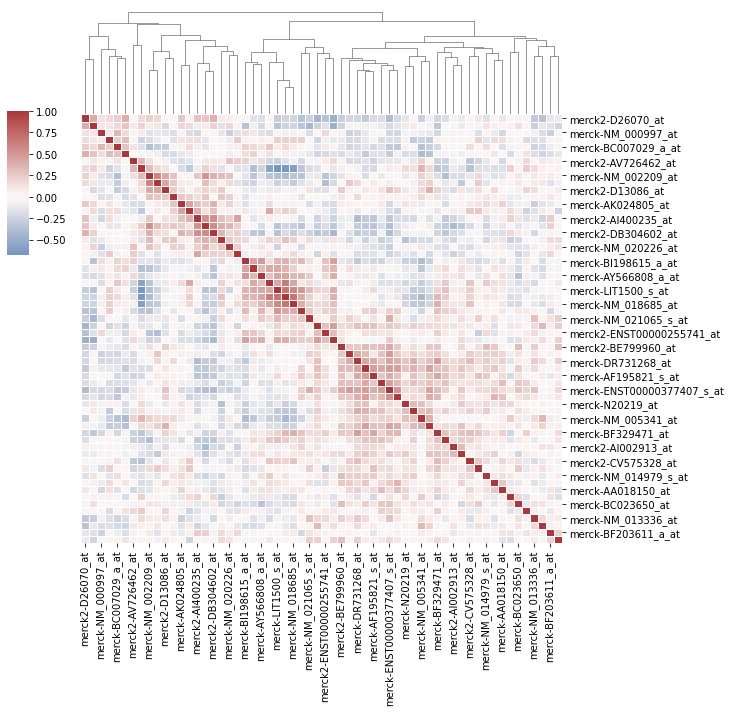

In [17]:
# check for correlation
plot_df = gene.copy()
plot_df = plot_df.sample(60, axis='columns') # Sample random 60 genes just to get an idea
g = sns.clustermap(plot_df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(-.01, .64, .03, .2),
                   linewidths=.75, figsize=(10, 10))

g.ax_row_dendrogram.remove()

In [18]:
# if variables are highly correlated we can choose one of the variables instead of both variables. 
dfc = gene.copy()
dfc = dfc.select_dtypes(include=['float64','int64']) # only take numeric values

#filter highly related genes
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

to_remove = pd.DataFrame(corrFilter(dfc, .7))
to_remove.tail()

,,0
merck2-NM_148964_a_at,merck-NM_001910_at,0.996917
merck2-AB076839_at,merck-ENST00000262056_a_at,0.997052
merck2-NM_030644_a_at,merck2-NM_145640_a_at,0.997742
merck-NM_005099_at,merck2-NM_005099_x_at,0.998525
merck-F01177_x_at,merck-F01177_x_at,NaN


In [19]:
genes_to_remove = to_remove.reset_index()['level_1'].tolist()
print(gene.shape)
gene = gene.drop(genes_to_remove, axis = 1)
print(gene.shape)

(89, 6001)
(89, 5131)


<a name='wrang'></a>
## 1.3 Merge data into one dataframe

Since we have now a table clinical containing 89 rows, and a table gene containing 89 rows we can merge them together into one table

In [20]:
df = clinical.join(gene)

In [21]:
df = df.set_index(['sample.name', 'sampleID'])
df.head(3)

,,source.location,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.grade,merck-AF085827_at,merck-CN388529_a_at,...,merck2-DB353125_at,merck-ENST00000370859_at,merck-NM_017672_at,merck2-NM_001003941_at,merck2-NM_016387_at,merck-NM_001007536_at,merck-AW166770_at,merck2-AF161505_at,merck-AK096649_s_at,merck-AW449370_s_at
sample.name,sampleID,,,,,,,,,,,,,,,,,,,,,
LUNG3-01,GSM1416528,Left Lower Lobe,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,3,3.637351,8.229876,...,7.538552,5.790169,8.388805,5.061959,7.256526,2.683086,4.172924,6.262818,5.997550,4.043898
LUNG3-02,GSM1416529,Left Lower Lobe,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Not Available,3.836576,6.528464,...,6.855899,4.196827,8.083955,5.157835,6.663538,3.186574,5.360590,4.104841,6.078504,4.360657
LUNG3-03,GSM1416530,Left Lower Lobe,M,Non-Small Cell,11.0,pT3,pN0,pM0,3,3.048971,8.366914,...,6.743870,4.701207,7.562181,5.539737,7.413414,2.407864,4.832367,4.469485,3.637001,4.623743


---

# 2 Exploratory data analysis

Before we move into the analysis we need to inspect the structure and format of the data. We need to check the quality and quantity of the data. For each column in a DataFrame, we should understand the content, the meaning of the column label, the used datatype, and the used units. We cannot interpret the results if we do not understand fully the context of the data and the quality of the data. A few standard questions you should always consider are

- What is the [structure](#info) of the data (datatypes). 
- [How many features and how many observations are there available](#info)
- Are there any [missing](#miss) data and is imputation needed?
- Is my data [balanced](#balance)? 
- Are there [outliers](#out)?
- Is [normalization](#norm) needed?
- Is data [transformation](#trans) needed?
- Is data [redundant](#redu)?
- Is data independent from each other or are there any [relations](#corr)?

Furthermore, it might be needed to reshape data, subset the data, or combine it with other sources to structure it in a final format. Some of the above questions can be answered by analyzing the structure and the statistics of the data. Other questions need to be answered by plotting the data. A list of most commonly used methods and attributes:

- `df.head()` # show the first records of a dataset
- `list(df.columns)` # list the columnnames
- `len(df)` # returns number of rows
- `df.shape` # returns the number of rows and columns of the dataset
- `df.dtypes` # returns the datatypes
- `df.info()` # returns a summary of the structure
- `df.describe().T` #returns descriptive stats (transposed) 
- `df.isnull().sum()` # returns the sum of missing values across columns
- `df['column'].unique()` # returns uniques in a column
- `df['column'].value_counts()` # returns uniques and counts
- `df.corr()` # creates a correlation matrix, input for a heatmap


There is a library that generates automatically an EDA report. This can be retrieved here. Since this is quit a large file we will do some manual checks as well. 

In [22]:
# Generate a quick report from our dataset 
from pandas_profiling import ProfileReport  
#We check only the clinical data since the gene data takes to much memory
profile = ProfileReport(clinical, minimal=True)
profile.to_file("EDA-Report.html")
profile


Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a name='info'></a>
## 2.1 check the data type

In [23]:
# is the data of correct data type?
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 89 entries, ('LUNG3-01', 'GSM1416528') to ('LUNG3-89', 'GSM1416616')
Columns: 5138 entries, source.location to merck-AW449370_s_at
dtypes: float64(5131), object(7)
memory usage: 3.5+ MB


In [24]:
# check the clinical part
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   sample.name                                     89 non-null     object 
 1   source.location                                 89 non-null     object 
 2   characteristics.tag.gender                      89 non-null     object 
 3   characteristics.tag.histology                   89 non-null     object 
 4   characteristics.tag.tumor.size.maximumdiameter  88 non-null     float64
 5   characteristics.tag.stage.primary.tumor         89 non-null     object 
 6   characteristics.tag.stage.nodes                 89 non-null     object 
 7   characteristics.tag.stage.mets                  89 non-null     object 
 8   characteristics.tag.grade                       89 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB

In [25]:
# We expect grade to be numeric
clinical['characteristics.tag.grade'].value_counts()

Not Available    37
3                25
2                20
1                 6
4                 1
Name: characteristics.tag.grade, dtype: int64

In [26]:
# change not available into NaN
clinical['characteristics.tag.grade'] = clinical['characteristics.tag.grade'].apply(pd.to_numeric, errors='coerce')
clinical['characteristics.tag.grade'].value_counts()

3.0    25
2.0    20
1.0     6
4.0     1
Name: characteristics.tag.grade, dtype: int64

In [27]:
# We expect grade to be numeric
clinical['characteristics.tag.grade'].value_counts()

3.0    25
2.0    20
1.0     6
4.0     1
Name: characteristics.tag.grade, dtype: int64

In [28]:
#this works so let's apply this to our dataframe
df['characteristics.tag.grade'] = df['characteristics.tag.grade'].apply(pd.to_numeric, errors='coerce')

<a name='miss'></a>
## 2.2 check for missing data

In [29]:
# are there any missing values?
for i,v in enumerate(df.isnull().sum()):
    if v > 0:
        print(df.columns[i],v)

characteristics.tag.tumor.size.maximumdiameter 1
characteristics.tag.grade 37


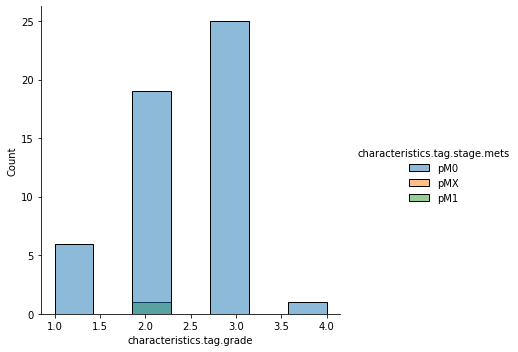

In [30]:
# remove column grade or impute. There are too many missing values
# can we impute grade?
sns.displot(clinical, x="characteristics.tag.grade", hue="characteristics.tag.stage.mets")

<AxesSubplot:xlabel='characteristics.tag.grade', ylabel='characteristics.tag.tumor.size.maximumdiameter'>

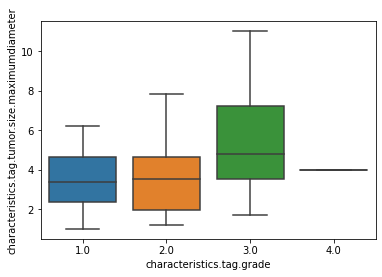

In [31]:
sns.boxplot(data = clinical, x ='characteristics.tag.grade', y = 'characteristics.tag.tumor.size.maximumdiameter')

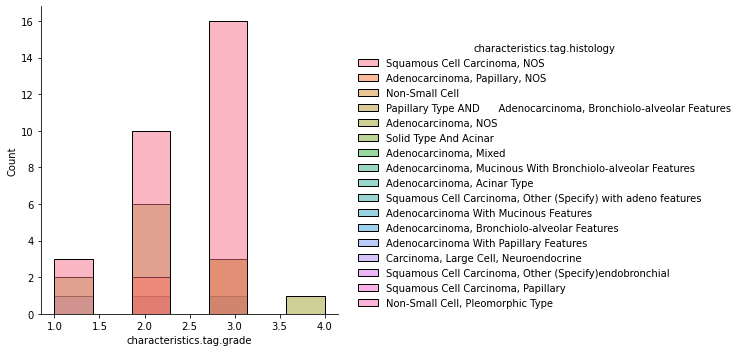

In [32]:
sns.displot(clinical, x="characteristics.tag.grade", hue="characteristics.tag.histology")

In [33]:
group = clinical.copy()
group = group.groupby(by=["characteristics.tag.grade"]).mean()['characteristics.tag.tumor.size.maximumdiameter']
group

characteristics.tag.grade
1.0    3.500
2.0    3.540
3.0    5.504
4.0    4.000
Name: characteristics.tag.tumor.size.maximumdiameter, dtype: float64

In [34]:
# I do not see a patern so I decide to just fill with the mean
df = df.fillna(2)
for i,v in enumerate(df.isnull().sum()):
    if v > 0:
        print(df.columns[i],v)

In [35]:
# or simply drop the column
df = df.drop('characteristics.tag.grade', axis = 1) # drop the column

<a name='balance'></a>
## 2.3 check for balanced data

[Text(0, 0, 'Squamous Cell Carcinoma, NOS'),
 Text(1, 0, 'Adenocarcinoma, Papillary, NOS'),
 Text(2, 0, 'Non-Small Cell'),
 Text(3, 0, 'Papillary Type AND \xa0\xa0\xa0\xa0 Adenocarcinoma, Bronchiolo-alveolar Features'),
 Text(4, 0, 'Adenocarcinoma, NOS'),
 Text(5, 0, 'Solid Type And Acinar'),
 Text(6, 0, 'Adenocarcinoma, Mixed'),
 Text(7, 0, 'Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features'),
 Text(8, 0, 'Adenocarcinoma, Acinar Type'),
 Text(9, 0, 'Squamous Cell Carcinoma, Other (Specify) with adeno features'),
 Text(10, 0, 'Adenocarcinoma With Mucinous Features'),
 Text(11, 0, 'Adenocarcinoma, Bronchiolo-alveolar Features'),
 Text(12, 0, 'Adenocarcinoma With Papillary Features'),
 Text(13, 0, 'Carcinoma, Large Cell, Neuroendocrine'),
 Text(14, 0, 'Squamous Cell Carcinoma, Other (Specify)endobronchial'),
 Text(15, 0, 'Squamous Cell Carcinoma, Papillary'),
 Text(16, 0, 'Non-Small Cell, Pleomorphic Type')]

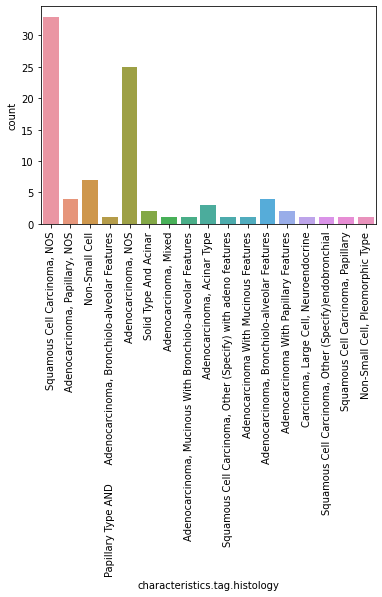

In [36]:
# is the data balanced? 
#Visualize how many tumor-types there are in this dataset 
g = sns.countplot(x=df['characteristics.tag.histology'],label="Count")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<a name='regex'></a>

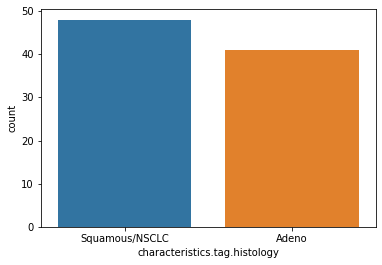

In [37]:

#There are many different tumor-types. We need to generalize those a bit, since the dataset is quite small (89 samples)
df['characteristics.tag.histology'] = df['characteristics.tag.histology'].str.replace(r'(^.*Squamous.*$)', 'Squamous/NSCLC', regex=True)
df['characteristics.tag.histology'] = df['characteristics.tag.histology'].str.replace(r'(Adeno.*$)', 'Adeno', regex=True)
df['characteristics.tag.histology'] = df['characteristics.tag.histology'].str.replace(r'(^.* .*$)', 'Squamous/NSCLC', regex=True)
g = sns.countplot(x=df['characteristics.tag.histology'],label="Count")

<a name='out'></a>
## 2.4 Are there outliers and how might they effect the model? 
Only remove if they are mis measurements or typos


In [38]:
nums = clinical.select_dtypes(include=['int64','float64'])
for i in nums.columns:
    lower = nums[i].quantile(.05)
    upper = nums[i].quantile(.95)
    subset = nums[nums[i] > upper]
    print(f'column {i} has outlier(s) in row number(s) {subset.index.values.tolist()}')
    

column characteristics.tag.tumor.size.maximumdiameter has outlier(s) in row number(s) [2, 6, 14, 28, 29]
column characteristics.tag.grade has outlier(s) in row number(s) [51]


<a name='trans'></a>
## 2.5 check if data needs transformation

Some algorithms need numerical data to calculate with. This means that gender M / F needs to be transformed to a number. We can type cast the data with `map`


In [39]:
df['characteristics.tag.gender'] = df['characteristics.tag.gender'].map({'M': 0, 'F':1})

In [40]:
df.head()

,,source.location,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,merck-AF085827_at,merck-CN388529_a_at,merck-AI671741_a_at,...,merck2-DB353125_at,merck-ENST00000370859_at,merck-NM_017672_at,merck2-NM_001003941_at,merck2-NM_016387_at,merck-NM_001007536_at,merck-AW166770_at,merck2-AF161505_at,merck-AK096649_s_at,merck-AW449370_s_at
sample.name,sampleID,,,,,,,,,,,,,,,,,,,,,
LUNG3-01,GSM1416528,Left Lower Lobe,0,Squamous/NSCLC,4.0,pT2,pN0,pM0,3.637351,8.229876,8.366507,...,7.538552,5.790169,8.388805,5.061959,7.256526,2.683086,4.172924,6.262818,5.997550,4.043898
LUNG3-02,GSM1416529,Left Lower Lobe,0,Adeno,1.3,pT1,pNX,pMX,3.836576,6.528464,6.744386,...,6.855899,4.196827,8.083955,5.157835,6.663538,3.186574,5.360590,4.104841,6.078504,4.360657
LUNG3-03,GSM1416530,Left Lower Lobe,0,Squamous/NSCLC,11.0,pT3,pN0,pM0,3.048971,8.366914,8.555722,...,6.743870,4.701207,7.562181,5.539737,7.413414,2.407864,4.832367,4.469485,3.637001,4.623743
LUNG3-04,GSM1416531,Left Lower Lobe,0,Squamous/NSCLC,2.0,pTX,pNx,pM1,3.130737,7.411310,9.030449,...,7.562751,2.501085,8.353519,4.830194,6.507727,3.069240,4.300932,3.943254,7.296295,3.946126
LUNG3-05,GSM1416532,Left Lower Lobe,1,Squamous/NSCLC,7.8,pT3,pN0,pM0,3.431119,7.604632,10.191536,...,6.867670,4.743476,8.188396,5.862296,7.023017,2.706521,4.498659,3.336984,5.307805,4.939343


## 2.6 Create the feature matrix and vector

In [41]:
y = np.array(df['characteristics.tag.histology'])
print(y.shape)
X = df.select_dtypes(include=['float64','int64']) # only take numeric values
print(X.shape)
# X = df.drop('characteristics.tag.histology', axis = 1) # or drop only the label

(89,)
(89, 5132)


<a name='norm'></a>
## 2.7 Normalize data

In [42]:
#normalize
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

---

# 3. Conclusion



For further analysis I had to transpose and join my datafiles to one dataset. I had to filter out features which I did with features that had only one value and features which were higly correlated. I needed to rebalance my label which I did with string manipulation. I had to transform some of the categorical data to numerical data. Because of the different in scales I needed to normalize my data. I had to deal with missing data. I did not check the distribution of the genes, which I should and problably I could eliminate more features using a quality treshold. 